In [2]:
import lightgbm as lgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss
import numpy as np
import matplotlib.pyplot as plt
print ("All imports succesful")

All imports succesful


In [15]:
# Generate classification dataset
X, y = make_classification(
          n_samples=5000, n_features=30, n_informative=20,
          n_redundant=10, n_classes=2, random_state=42
       )
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create LightGBM datasets
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

params = {
'objective': 'binary',
'metric': ['binary_logloss', 'auc'],
'boosting_type': 'gbdt',
'num_leaves': 31,
'learning_rate': 0.05,
'feature_fraction': 0.9,
'bagging_fraction': 0.8,
'bagging_freq': 5,
'verbose': -1
}

eval_result = {}
# Train the model
print("Training LightGBM model...")
lgb_model = lgb.train(
params,
train_data,
num_boost_round=200,
valid_sets=[train_data, test_data],
valid_names=['train', 'test'],
callbacks=[lgb.early_stopping(stopping_rounds=20), lgb.log_evaluation(period=50),lgb.record_evaluation(eval_result=eval_result)]
)
print("model training with lgboost successful")

Training LightGBM model...
Training until validation scores don't improve for 20 rounds
[50]	train's binary_logloss: 0.204645	train's auc: 0.995403	test's binary_logloss: 0.289879	test's auc: 0.968708
[100]	train's binary_logloss: 0.0866763	train's auc: 0.999364	test's binary_logloss: 0.191818	test's auc: 0.981036
[150]	train's binary_logloss: 0.0410171	train's auc: 0.999985	test's binary_logloss: 0.149839	test's auc: 0.98618
[200]	train's binary_logloss: 0.0202693	train's auc: 1	test's binary_logloss: 0.126657	test's auc: 0.988908
Did not meet early stopping. Best iteration is:
[200]	train's binary_logloss: 0.0202693	train's auc: 1	test's binary_logloss: 0.126657	test's auc: 0.988908
model training with lgboost successful


In [16]:
# Make predictions
y_pred_proba = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)
y_pred = (y_pred_proba > 0.5).astype(int)

# Evaluate performance
print("\nLightGBM Classification Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"Log Loss: {log_loss(y_test, y_pred_proba):.4f}")


LightGBM Classification Results:
Accuracy: 0.9620
AUC-ROC: 0.9889
Log Loss: 0.1267


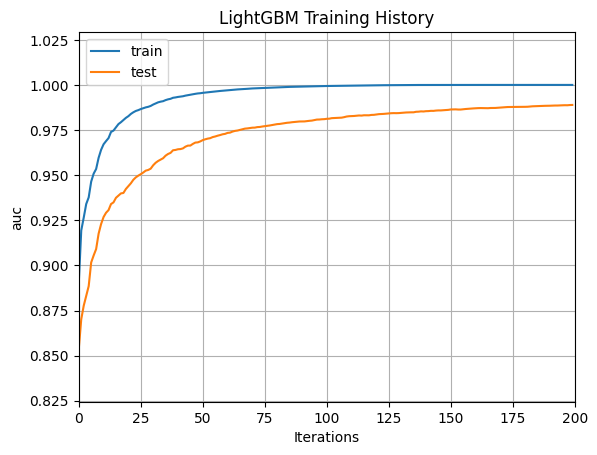

In [17]:
# Plot training history
lgb.plot_metric(booster=eval_result, metric='auc')
plt.title('LightGBM Training History')
plt.show()

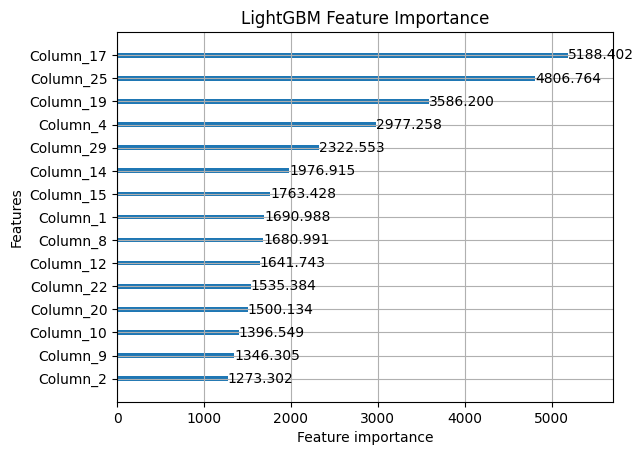

In [18]:
# Feature importance
lgb.plot_importance(lgb_model, max_num_features=15, importance_type='gain')
plt.title('LightGBM Feature Importance')
plt.show()